In [57]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [59]:
merge_meso_2019 = pd.read_csv('../merged/merged_meso_2019.csv', parse_dates=['DATE'])

In [60]:
del merge_meso_2019['TVS_max']

In [61]:
outage = merge_meso_2019[merge_meso_2019['power_outage']==True]
no_outage = merge_meso_2019[merge_meso_2019['power_outage']==False]

In [62]:
merge_meso_2019['y'] = 0

merge_meso_2019.loc[merge_meso_2019.power_outage == True, 'y']=1

In [64]:
merge_meso_2019['DATE'] = pd.to_datetime(merge_meso_2019['DATE'])
merge_meso_2019['Month'] = merge_meso_2019['DATE'].dt.month

In [91]:
all_features =([merge_meso_2019.columns[3], 
                merge_meso_2019.columns[4]] +
                merge_meso_2019.columns[6:14].tolist() +
                [merge_meso_2019.columns[18]])

In [ ]:
all_features

In [65]:
merge_meso_2019.head()

,Unnamed: 0,index,DATE,LAT_mean,LON_mean,STR_RANK_max,LL_ROT_VEL_max,LL_DV_max,LL_BASE_max,DEPTH_KFT_max,DPTH_STMRL_max,MAX_RV_KFT_max,MAX_RV_KTS_max,MSI_max,county,state,power_outage,y,Month
0,0,0,2019-01-01,35.30391,-106.70199,9,52,61,14,12,100,24,63,5559,Sandoval County,New Mexico,False,0,1
1,1,1,2019-01-01,35.79095,-106.68525,6L,35,44,7,12,100,11,46,3419,Sandoval County,New Mexico,False,0,1
2,2,2,2019-01-01,35.35228,-106.68135,5L,33,47,9,8,100,16,62,4740,Sandoval County,New Mexico,False,0,1
3,3,3,2019-01-01,34.96357,-107.08421,5L,31,43,9,4,100,12,46,3480,Cibola County,New Mexico,False,0,1
4,4,4,2019-01-01,35.44015,-106.72896,5L,40,45,10,3,100,10,40,2431,Sandoval County,New Mexico,False,0,1


In [66]:
meso_train, meso_test = train_test_split(merge_meso_2019.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.2,
                                              stratify=merge_meso_2019.y.values)

In [67]:
meso_tt, meso_val = train_test_split(meso_train.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.2,
                                              stratify=meso_train.y.values)

In [68]:
outage = meso_tt[meso_tt['power_outage']==True]
no_outage = meso_tt[meso_tt['power_outage']==False]
no_outage= no_outage.sample(n=len(outage), random_state=101)
meso_tt_balanced = pd.concat([outage,no_outage],axis=0)

In [69]:
n_splits = 5

kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=498)

In [70]:
all_features =([merge_meso_2019.columns[3], 
                merge_meso_2019.columns[4]] +
                merge_meso_2019.columns[6:14].tolist() +
                [merge_meso_2019.columns[18]])

In [ ]:
for col in meso_tt_balanced.columns[6:14]:
    plt.figure(figsize=(8,5))


    plt.hist(meso_tt_balanced.loc[meso_tt_balanced.y==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(meso_tt_balanced.loc[meso_tt_balanced.y==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [74]:
log_accs = np.zeros(5)

i = 0
for train_index, test_index in kfold.split(meso_tt_balanced, meso_tt_balanced.y):
    meso_tt_tt = meso_tt_balanced.iloc[train_index]
    meso_ho = meso_tt_balanced.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None, max_iter = 1000)
        
    log_reg.fit(meso_tt_tt[all_features].values,
                   meso_tt_tt.y.values)
        
    pred = log_reg.predict(meso_ho[all_features].values)
    
    log_accs[i] = accuracy_score(meso_ho.y.values,
                                              pred)
    
    i = i + 1

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [75]:
np.mean(log_accs)

0.6922264592441627

In [76]:
log_recs = np.zeros(5)
log_precis = np.zeros(5)

i = 0
for train_index, test_index in kfold.split(meso_tt_balanced, meso_tt_balanced.y):
    meso_tt_tt = meso_tt_balanced.iloc[train_index]
    meso_ho = meso_tt_balanced.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None, max_iter = 1000)
        
    log_reg.fit(meso_tt_tt[all_features].values,
                   meso_tt_tt.y.values)
        
    pred = log_reg.predict(meso_ho[all_features].values)
    
    log_recs[i] = recall_score(meso_ho.y.values,
                                              pred)
    log_precis[i] = precision_score(meso_ho.y.values,
                                              pred)
    
    i = i + 1

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [77]:
np.mean(log_recs)

0.7424755343384332

In [78]:
np.mean(log_precis)

0.6746349263367858

In [79]:
ks = range(1,56)


k_all_accs = np.zeros((5, len(ks)))
k_all_recs = np.zeros((5, len(ks))) 
k_all_precis = np.zeros((5, len(ks))) 

i = 0
for train_index, test_index in kfold.split(meso_tt_balanced, meso_tt_balanced.y):
    meso_bal_tt = meso_tt_balanced.iloc[train_index]
    meso_ho = meso_tt_balanced.iloc[test_index]
    
    j = 0
    for k in ks:
        knn = Pipeline([('scale', StandardScaler()),('knn_cls', KNeighborsClassifier(k))])
        
        knn.fit(meso_bal_tt[all_features].values,
                   meso_bal_tt.y.values)
        
        pred = knn.predict(meso_ho[all_features].values)
        
        k_all_accs[i,j] = accuracy_score(meso_ho.y.values, pred)

        k_all_recs[i] = recall_score(meso_ho.y.values,
                                              pred)
        
        k_all_precis[i] = precision_score(meso_ho.y.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [80]:
np.mean(k_all_accs)

0.8189735537426536

In [81]:
np.mean(k_all_recs)

0.8745816973261702

In [82]:
np.mean(k_all_precis)

0.7719033184046648

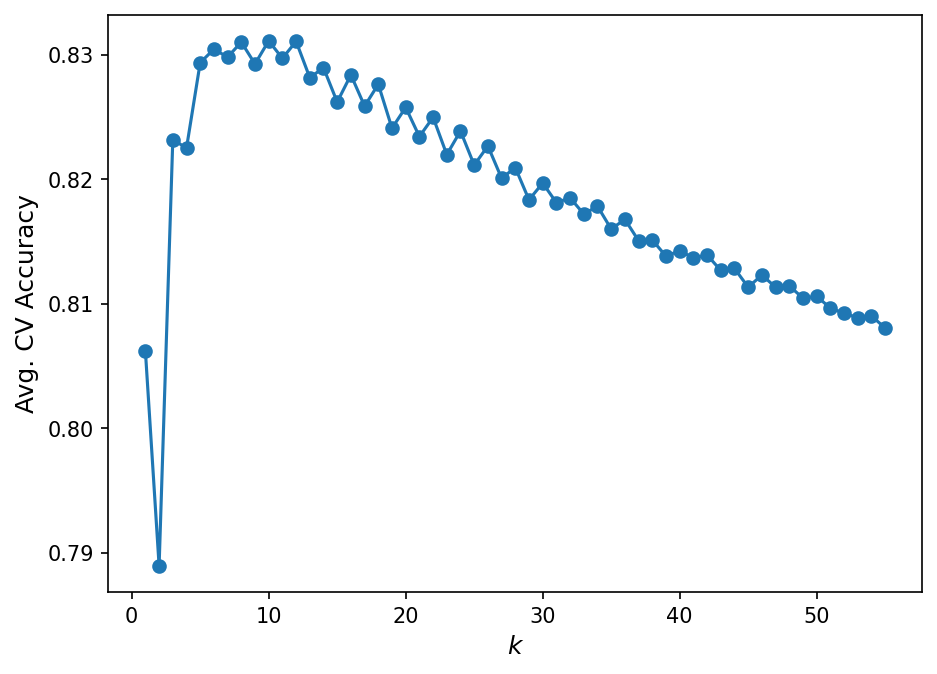

In [83]:
plt.figure(figsize=(7,5))


plt.plot(ks, 
         np.mean(k_all_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

In [84]:
best_k = np.argmax(np.mean(k_all_accs, axis=0))
best_k_acc = np.mean(k_all_accs, axis=0)[best_k]

print("The optimal value of k was", best_k + 1, "which achieved a mean CV accuracy of ", best_k_acc)

The optimal value of k was 10 which achieved a mean CV accuracy of  0.8311241046820271


In [92]:
knn_best = KNeighborsClassifier(n_neighbors=10)

In [93]:
knn_best.fit(meso_tt_balanced[all_features].values,
                   meso_tt_balanced.y.values)

pred_best = knn_best.predict(meso_val[all_features].values)

In [94]:
print("accuracy score:", accuracy_score(meso_val.y.values, pred_best))
print("recall score:", recall_score(meso_val.y.values, pred_best))
print("precision score:", precision_score(meso_val.y.values, pred_best))

accuracy score: 0.6655794722800352
recall score: 0.6207177814029364
precision score: 0.07708202499848064


In [95]:
outage_train = meso_train[meso_train['power_outage']==True]
no_outage_train = meso_train[meso_train['power_outage']==False]
no_outage_train= no_outage_train.sample(n=len(outage_train), random_state=101)
meso_train_balanced = pd.concat([outage_train,no_outage_train],axis=0)

In [96]:
knn_best.fit(meso_train_balanced[all_features].values,
                   meso_train_balanced.y.values)

pred_test_best = knn_best.predict(meso_test[all_features].values)

In [97]:
print("accuracy score:", accuracy_score(meso_test.y.values, pred_test_best))
print("recall score:", recall_score(meso_test.y.values, pred_test_best))
print("precision score:", precision_score(meso_test.y.values, pred_test_best))

accuracy score: 0.6683447127579926
recall score: 0.6335160532498042
precision score: 0.07904893738294927
